<a href="https://colab.research.google.com/github/michaufsc/betalactam/blob/main/beta04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Part 4] Regression Models with Random Forest
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 4, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import dataset

In [ ]:
! wget /content/drive/MyDrive/Alfavaca/betalactamase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

/content/drive/MyDrive/Alfavaca/betalactamase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv: Scheme missing.


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Alfavaca/betalactamase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

3. Input features
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

3.1. Input features

In [6]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


3.2. Output features

In [7]:
Y = df.pIC50
Y

0     6.194227
1     7.530178
2     5.972284
3     7.764472
4     7.176526
5     6.024384
6     5.076430
7     7.050610
8     5.307744
9     7.105684
10    5.248552
11    6.854182
12    5.136279
13    4.707035
14    7.185752
15    4.877470
16    7.567031
17    6.060181
18    7.514279
19    8.036212
20    6.370488
21    6.915424
22    7.663540
23    5.806458
24    7.354578
25    5.096042
26    5.384587
27    4.626693
28    9.698970
29    8.455932
30    8.769551
31    8.619789
32    8.744727
33    8.376751
34    6.595166
35    7.137869
36    7.013228
37    3.926637
38    4.749848
39    7.974694
40    8.853872
41    5.357308
42    4.484126
43    5.259637
44    8.522879
45    8.301030
46    3.903090
47    5.468521
48    4.252588
Name: pIC50, dtype: float64

3.3. Let's examine the data dimension

In [8]:
X.shape

(49, 881)

In [10]:
Y.shape

(49,)

3.4. Remove low variance features

In [11]:

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [12]:
X.shape

(49, 57)

4. Data split (80/20 ratio)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((39, 57), (39,))

In [15]:
X_test.shape, Y_test.shape

((10, 57), (10,))

5. Building a Regression Model using Random Forest

In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3890167788484984

In [17]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

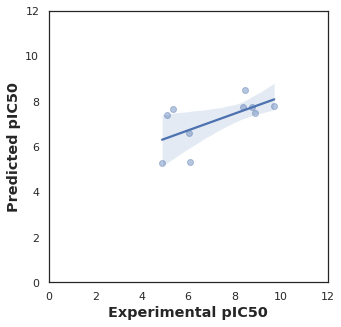

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show